#### Introduction
With the cleaned data, we explore application of machine learning in prediction taxi counts in the various sectors.

In [1]:
# import the needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', None)
plt.style.use('seaborn-whitegrid')
plt.rc('figure', figsize=(10,4), titlesize=16, titleweight='bold')
plt.rc('axes', titlesize=16, titleweight='bold', titlepad=10, labelsize=14, labelweight='bold')
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)

In [3]:
# load data
df = pd.read_csv('use_cleaned.csv')
df.head(1)

,time,properties.taxi_count,day_of_week,minute,hour,sector_1,sector_2,sector_4,sector_5,sector_8
0,2022-04-01 00:00:00,2434,4,0,0,127,793,291,1217,6


In [4]:
# get the independent and dependent variables. 
X = df.iloc[:, [2,3,4]]
print(X.shape)
y1, y2, y4, y5, y8 = df['sector_1'], df['sector_2'], df['sector_4'], df['sector_5'], df['sector_8']
print(y1.shape)
print(y8.shape)

(8323, 3)
(8323,)
(8323,)


In [5]:
# import the libraries (try these for now)
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

### Approach
* We go for an arbitary 80-20 split;
* for each dependent variable, we'll train and do predict using each model; followed by
* review of the RMSE and test linearity with a scatter plot to see predicted values versus the actual values

In [6]:
# function for train test splits
def traintestset(X, yN):
    Xtrain, Xtest, ytrain, ytest = train_test_split(X, yN, test_size=0.2, random_state=0)
    return Xtrain, Xtest, ytrain, ytest

In [7]:
# train test set for sector 1
X1_train, X1_test, y1_train, y1_test = traintestset(X, y1)

In [8]:
# instantiate the list of models to use
dummy = DummyRegressor()
lr = LinearRegression()
dt = DecisionTreeRegressor(random_state=0)
rf = RandomForestRegressor(random_state=0)
# consolidate as a list to iterate over
modelList = [dummy, lr, dt, rf]

In [9]:
# function for model fit, predictions
def modeltrainer(Xtrain, Xtest, ytrain, ytest):
    predList = []
    for model in modelList:
        model.fit(Xtrain, ytrain)
        pred = model.predict(Xtest)
        predList.append(pred)
    return predList

In [10]:
# iterate over the models, train and predict using sector 1 train test set
pred_sector1 = modeltrainer(X1_train, X1_test, y1_train, y1_test)

In [13]:
modelNameList = ['Dummy', 'LinearReg', 'DecisionTree', 'RandForest']
# function for RMSE of the model predictions
def RMSEreport(modelNameList, ytest, predList):
    for i in range(0, len(modelNameList)):
        print(f'{modelNameList[i]} RMSE: {mean_squared_error(ytest, predList[i], squared=False):3g}')

In [11]:
# function to get sector y_true and pred as dataframe
def ResDf(ytrue, predList, modelNameList):
    df_res = ytrue.to_frame()
    for i in range(0, len(modelNameList)):
        df_res[f'{modelNameList[i]}'] = predList[i]
    return df_res

In [16]:
# function to test linearity with a scatter plot for each model prediction
def scatterPlots(ytrueName, df_res):
    for i in range(0, len(modelNameList)):
        sns.lmplot(x=ytrueName, y=modelNameList[i], data=df_res, fit_reg=False)
        d_line= np.arange(df_res.min().min(), df_res.max().max())
        plt.plot(d_line, d_line, color='purple', linestyle='--', linewidth=2)
        plt.show()

In [17]:
# sector 1 results as dataframe
df_res1 = ResDf(y1_test, pred_sector1, modelNameList)
df_res1

,sector_1,Dummy,LinearReg,DecisionTree,RandForest
1364,46,79.425653,87.847333,82.333333,81.875310
1870,64,79.425653,80.053770,44.500000,45.479373
5421,142,79.425653,86.919068,96.500000,98.042833
5190,128,79.425653,87.900966,88.000000,89.016429
2337,67,79.425653,71.584120,60.500000,60.331500
...,...,...,...,...,...
4942,61,79.425653,91.391145,108.666667,108.055917
4084,135,79.425653,74.645635,103.250000,101.658583
2406,94,79.425653,71.106579,84.333333,86.485917
2252,127,79.425653,75.789750,72.333333,72.261952


Dummy RMSE: 29.8348
LinearReg RMSE: 28.8057
DecisionTree RMSE: 31.7598
RandForest RMSE: 30.5096


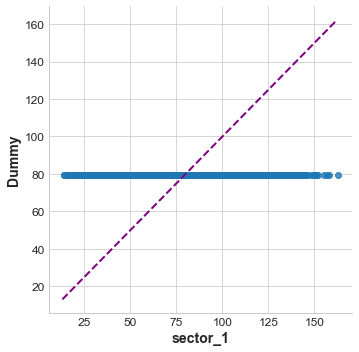

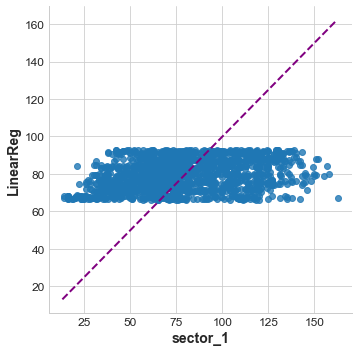

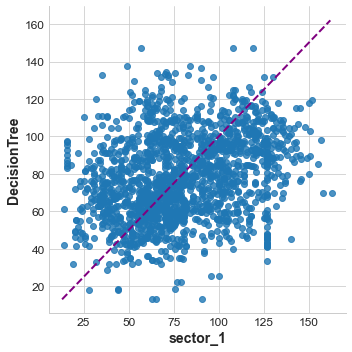

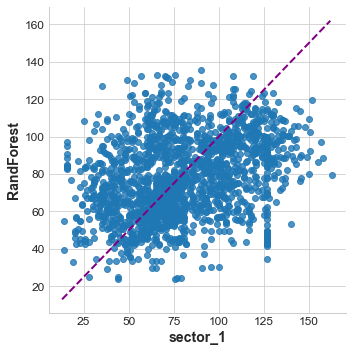

In [18]:
# Sector 1 RMSE
RMSEreport(modelNameList, y1_test, pred_sector1)
# Sector 1 scatter plots
scatterPlots('sector_1', df_res1)

In [19]:
# train test set for sectors2,4,5,8
X2_train, X2_test, y2_train, y2_test = traintestset(X, y2)
X4_train, X4_test, y4_train, y4_test = traintestset(X, y4)
X5_train, X5_test, y5_train, y5_test = traintestset(X, y5)
X8_train, X8_test, y8_train, y8_test = traintestset(X, y8)

In [20]:
# predictions 
pred_sector2 = modeltrainer(X2_train, X2_test, y2_train, y2_test)
pred_sector4 = modeltrainer(X4_train, X4_test, y4_train, y4_test)
pred_sector5 = modeltrainer(X5_train, X5_test, y5_train, y5_test)
pred_sector8 = modeltrainer(X8_train, X8_test, y8_train, y8_test)


In [21]:
# results as dataframes
df_res2 = ResDf(y2_test, pred_sector2, modelNameList)
df_res4 = ResDf(y4_test, pred_sector4, modelNameList)
df_res5 = ResDf(y5_test, pred_sector5, modelNameList)
df_res8 = ResDf(y8_test, pred_sector8, modelNameList)

Dummy RMSE: 165.268
LinearReg RMSE: 158.744
DecisionTree RMSE: 168.674
RandForest RMSE: 161.891


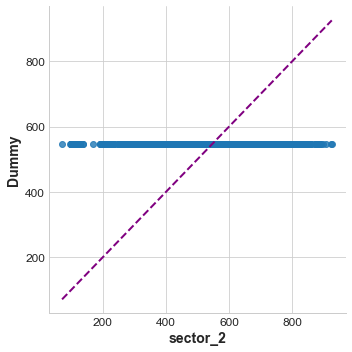

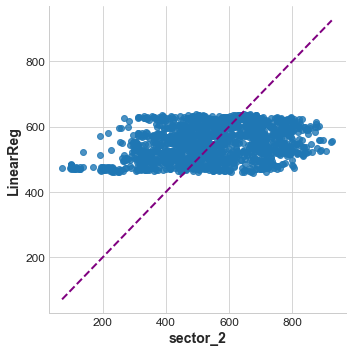

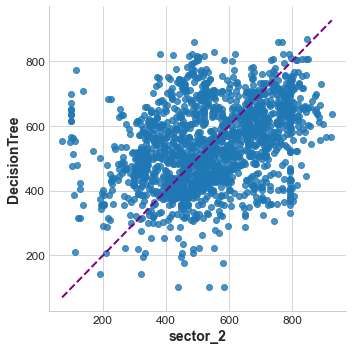

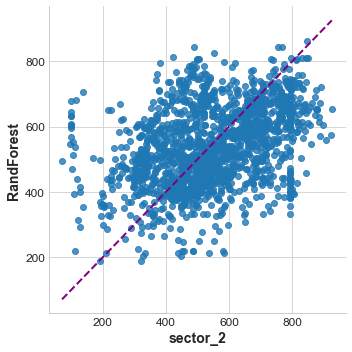

In [22]:
# Sector 2 RMSE
RMSEreport(modelNameList, y2_test, pred_sector2)
# Sector 2 scatter plots
scatterPlots('sector_2', df_res2)

Dummy RMSE: 86.8275
LinearReg RMSE: 80.7942
DecisionTree RMSE: 92.7803
RandForest RMSE: 88.9359


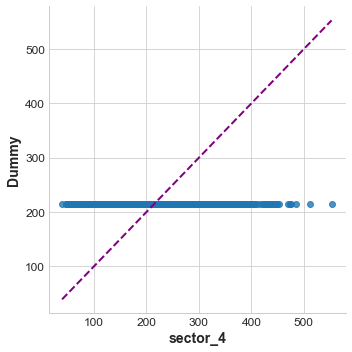

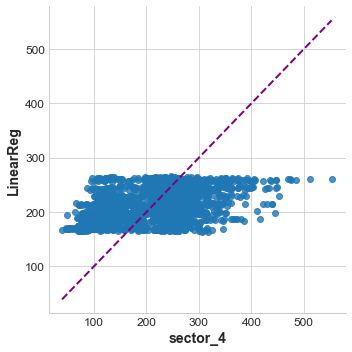

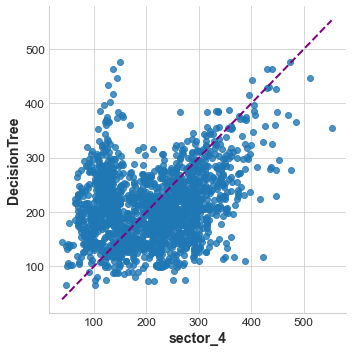

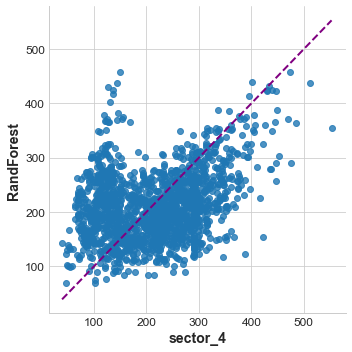

In [23]:
# Sector 4 RMSE
RMSEreport(modelNameList, y4_test, pred_sector4)
# Sector 4 scatter plots
scatterPlots('sector_4', df_res4)

Dummy RMSE: 408.081
LinearReg RMSE: 385.679
DecisionTree RMSE: 405.032
RandForest RMSE: 386.846


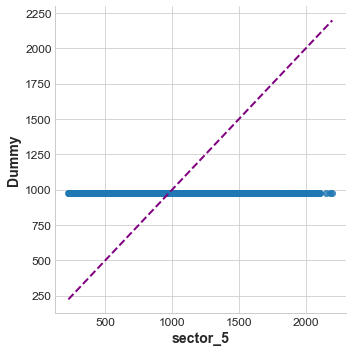

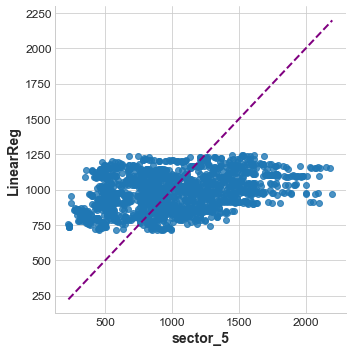

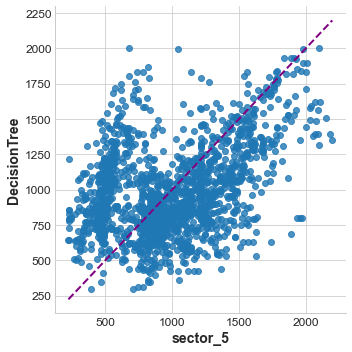

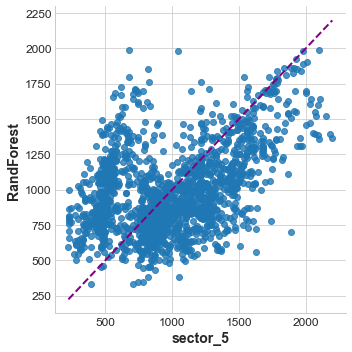

In [24]:
# Sector 5 RMSE
RMSEreport(modelNameList, y5_test, pred_sector5)
# Sector 5 scatter plots
scatterPlots('sector_5', df_res5)

Dummy RMSE: 4.39636
LinearReg RMSE: 4.34061
DecisionTree RMSE: 4.83522
RandForest RMSE: 4.6306


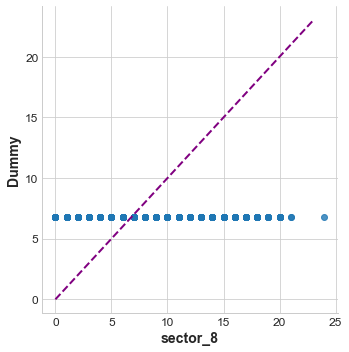

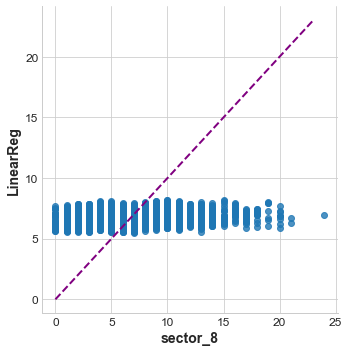

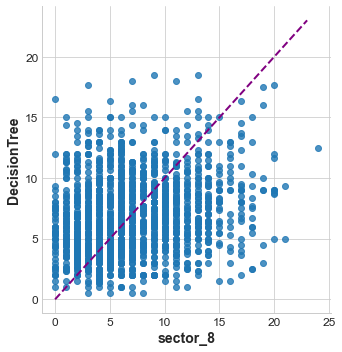

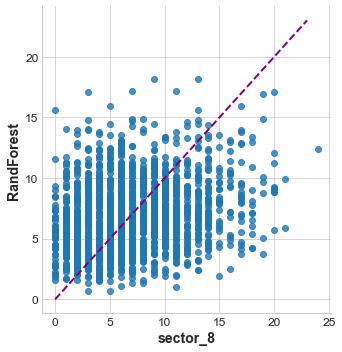

In [25]:
# Sector 8 RMSE
RMSEreport(modelNameList, y8_test, pred_sector8)
# Sector 8 scatter plots
scatterPlots('sector_8', df_res8)

A lower RMSE is generally better. Interestingly, the RMSE for models besides the dummy regressor can be higher the otherI attribute these to the spread of the data points. This wasn't the case when I tested on data from 2019 Jan. Below example is based on sector 8. Compared to past years, taxi availability really dropped as seen from the spread of the data points and from the visualizations.
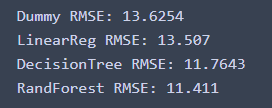

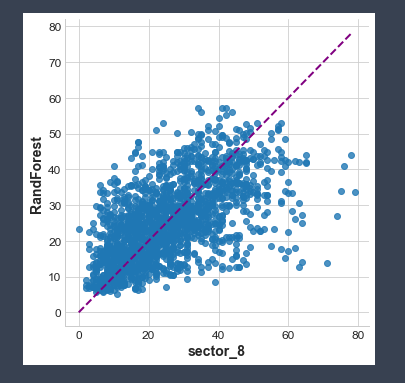